In [ ]:
from objects import Dorm, Student
from functions import sodaa, check_stability, overall_utility, mecha, mechb, mechc, linear_swf, quadratic_swf
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Process simulation results! We have 3 levels of indifferences (0.2, 0.5, 0.8), and for each, we have 5 different simulated preferences of both dorms and students. Each "configuration" was run 500 times, and the 5 number summary. mean, and std for both linear and quadratic social welfare functions were recorded. (Should have 15 csvs of shape (500,49), or 3 csvs of (2500, 49)).

Graphs to plot: histograms for each, line plots for each mechanism with the 5 configs, each with 3 colors to signify low medium high indiff

In [ ]:
# import results of simulation
cols = ['config', 
        'lin_sw_a', 'lin_min_a', 'lin_q1_a', 'lin_q2_a', 'lin_q3_a', 'lin_max_a', 'lin_mean_a', 'lin_std_a',
        'quad_sw_a', 'quad_min_a', 'quad_q1_a', 'quad_q2_a', 'quad_q3_a', 'quad_max_a', 'quad_mean_a', 'quad_std_a',
        'lin_sw_b', 'lin_min_b', 'lin_q1_b', 'lin_q2_b', 'lin_q3_b', 'lin_max_b', 'lin_mean_b', 'lin_std_b',
        'quad_sw_b', 'quad_min_b', 'quad_q1_b', 'quad_q2_b', 'quad_q3_b', 'quad_max_b', 'quad_mean_b', 'quad_std_b',
        'lin_sw_c', 'lin_min_c', 'lin_q1_c', 'lin_q2_c', 'lin_q3_c', 'lin_max_c', 'lin_mean_c', 'lin_std_c',
        'quad_sw_c', 'quad_min_c', 'quad_q1_c', 'quad_q2_c', 'quad_q3_c', 'quad_max_c', 'quad_mean_c', 'quad_std_c']

highindiff = pd.read_csv('./results/simulation_indiff_0.2.csv', header = None, names = cols, nrows = 2500)
medindiff  = pd.read_csv('./results/simulation_indiff_0.5.csv', header = None, names = cols, nrows = 2500)
lowindiff  = pd.read_csv('./results/simulation_indiff_0.8.csv', header = None, names = cols, nrows = 2500)

In [114]:
# I want prettier plots
plt.style.use('ggplot')
colors = ['#A9A9A9','#5CF0F0', '#80C3CF', '#7FCC9F','#265981'] # blue green pink purple gray
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
sns.set(font='Arial')

%matplotlib inline

Let's take a look at the expected welfare for each (mech,config) pair for each indifference level.

In [102]:
high_lin_mean  = highindiff.groupby('config').mean().reset_index()[['config','lin_sw_a', 'lin_min_a', 'lin_sw_b', 'lin_min_b', 'lin_sw_c', 'lin_min_c']]
high_quad_mean = highindiff.groupby('config').mean().reset_index()[['config','quad_sw_a', 'quad_min_a', 'quad_sw_b', 'quad_min_b', 'quad_sw_c', 'quad_min_c']]
med_lin_mean   = medindiff.groupby('config').mean().reset_index()[['config','lin_sw_a', 'lin_min_a', 'lin_sw_b', 'lin_min_b', 'lin_sw_c', 'lin_min_c']]
med_quad_mean  = medindiff.groupby('config').mean().reset_index()[['config','quad_sw_a', 'quad_min_a', 'quad_sw_b', 'quad_min_b', 'quad_sw_c', 'quad_min_c']]
low_lin_mean   = lowindiff.groupby('config').mean().reset_index()[['config','lin_sw_a', 'lin_min_a', 'lin_sw_b', 'lin_min_b', 'lin_sw_c', 'lin_min_c']]
low_quad_mean  = lowindiff.groupby('config').mean().reset_index()[['config','quad_sw_a', 'quad_min_a', 'quad_sw_b', 'quad_min_b', 'quad_sw_c', 'quad_min_c']]

In [128]:
high_lin_median  = highindiff.groupby('config').median().reset_index()[['config','lin_sw_a', 'lin_min_a', 'lin_sw_b', 'lin_min_b', 'lin_sw_c', 'lin_min_c']]
high_quad_median = highindiff.groupby('config').median().reset_index()[['config','quad_sw_a', 'quad_min_a', 'quad_sw_b', 'quad_min_b', 'quad_sw_c', 'quad_min_c']]
med_lin_median   = medindiff.groupby('config').median().reset_index()[['config','lin_sw_a', 'lin_min_a', 'lin_sw_b', 'lin_min_b', 'lin_sw_c', 'lin_min_c']]
med_quad_median  = medindiff.groupby('config').median().reset_index()[['config','quad_sw_a', 'quad_min_a', 'quad_sw_b', 'quad_min_b', 'quad_sw_c', 'quad_min_c']]
low_lin_median   = lowindiff.groupby('config').median().reset_index()[['config','lin_sw_a', 'lin_min_a', 'lin_sw_b', 'lin_min_b', 'lin_sw_c', 'lin_min_c']]
low_quad_median  = lowindiff.groupby('config').median().reset_index()[['config','quad_sw_a', 'quad_min_a', 'quad_sw_b', 'quad_min_b', 'quad_sw_c', 'quad_min_c']]

In [129]:
med_lin_mean

,config,lin_sw_a,lin_min_a,lin_sw_b,lin_min_b,lin_sw_c,lin_min_c
0,0.0,14790.472,8.0,14790.528,8.0,14790.480,8.0
1,1.0,14806.476,7.0,14806.542,7.0,14806.386,7.0
2,2.0,14869.000,6.0,14869.000,6.0,14869.000,6.0
3,3.0,14823.524,7.0,14823.444,7.0,14823.000,7.0
4,4.0,14799.270,6.0,14799.468,6.0,14799.386,6.0


In [126]:
high_quad_mean

,config,quad_sw_a,quad_min_a,quad_sw_b,quad_min_b,quad_sw_c,quad_min_c
0,0.0,146411.000,49.00,146411.000,49.00,146411.000,49.0
1,1.0,147987.382,56.71,147983.686,56.71,147969.016,49.0
2,2.0,146590.138,49.00,146583.490,49.00,146570.668,49.0
3,3.0,147324.140,64.00,147329.744,64.00,147338.020,64.0
4,4.0,147098.582,49.00,147094.140,49.00,147097.300,49.0


Here we plot the expected welfare values.

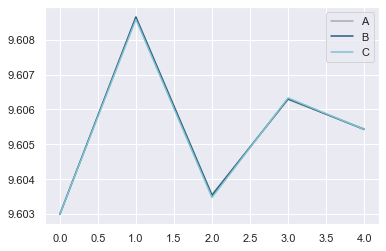

In [123]:
colors = ['#A9A9A9', '#265981', '#80C3CF']
plt.plot(high_lin_mean['config'], np.log(high_lin_mean['lin_sw_a']), color = colors[0], label='A')
plt.plot(high_lin_mean['config'], np.log(high_lin_mean['lin_sw_b']), color = colors[1], label='B')
plt.plot(high_lin_mean['config'], np.log(high_lin_mean['lin_sw_c']), color = colors[2], label='C')
plt.legend()
plt.show()

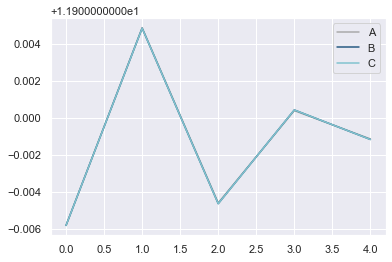

In [125]:
colors = ['#A9A9A9', '#265981', '#80C3CF']
plt.plot(high_quad_mean['config'], np.log(high_quad_mean['quad_sw_a']), color = colors[0], label='A')
plt.plot(high_quad_mean['config'], np.log(high_quad_mean['quad_sw_b']), color = colors[1], label='B')
plt.plot(high_quad_mean['config'], np.log(high_quad_mean['quad_sw_b']), color = colors[2], label='C')
plt.legend()
plt.show()

Now, plot histograms of linear and quadratic welfare values

In [ ]:
labels = ['Mechanism A', 'Mechanism B', 'Mechanism C']
colors = ['#A9A9A9', '#265981', '#80C3CF']
for i in range(5):
    fig, axs = plt.subplots(nrows=3, figsize=(6,7), sharex=True)
    lin_high_a = sns.histplot(highindiff.iloc[500*i:500*(i+1)]['lin_sw_a'], color='#A9A9A9', kde=True, ax = axs[0], label=labels[0])
    lin_high_a.ticklabel_format(useOffset=False)
    lin_high_b = sns.histplot(highindiff.iloc[500*i:500*(i+1)]['lin_sw_b'], color='#265981', kde=True, ax = axs[1], label=labels[1])
    lin_high_b.ticklabel_format(useOffset=False)
    lin_high_c = sns.histplot(highindiff.iloc[500*i:500*(i+1)]['lin_sw_c'], color='#80C3CF', kde=True, ax = axs[2], label=labels[2])
    lin_high_c.ticklabel_format(useOffset=False)
    lin_high_c.set(xlabel=f'Linear Welfare (Configuration {i+1})')
    for i,ax in enumerate(axs):
        axs[i].legend(loc="upper right")
    plt.tight_layout()
    lin_high_a.set_title('High Indifference, 500 Matchings\n(N=1500, M=10)')


In [ ]:
labels = ['Mechanism A', 'Mechanism B', 'Mechanism C']
colors = ['#A9A9A9', '#265981', '#80C3CF']
for i in range(5):
    fig, axs = plt.subplots(nrows=3, figsize=(6,7), sharex=True)
    lin_high_a = sns.histplot(medindiff.iloc[500*i:500*(i+1)]['lin_sw_a'], color='#A9A9A9', ax = axs[0], label=labels[0])
    lin_high_a.ticklabel_format(useOffset=False)
    lin_high_b = sns.histplot(medindiff.iloc[500*i:500*(i+1)]['lin_sw_b'], color='#265981', ax = axs[1], label=labels[1])
    lin_high_b.ticklabel_format(useOffset=False)
    lin_high_c = sns.histplot(medindiff.iloc[500*i:500*(i+1)]['lin_sw_c'], color='#80C3CF', ax = axs[2], label=labels[2])
    lin_high_c.ticklabel_format(useOffset=False)
    lin_high_c.set(xlabel=f'Linear Welfare (Configuration {i+1})')
    for i,ax in enumerate(axs):
        axs[i].legend(loc="upper right")
    plt.tight_layout()
    lin_high_a.set_title('Medium Indifference, 500 Matchings\n(N=1500, M=10)')

In [ ]:
labels = ['Mechanism A', 'Mechanism B', 'Mechanism C']
colors = ['#A9A9A9', '#265981', '#80C3CF']
for i in range(5):
    fig, axs = plt.subplots(nrows=3, figsize=(6,7), sharex=True)
    lin_high_a = sns.histplot(lowindiff.iloc[500*i:500*(i+1)]['lin_sw_a'], color='#A9A9A9', ax = axs[0], label=labels[0])
    lin_high_a.ticklabel_format(useOffset=False)
    lin_high_b = sns.histplot(lowindiff.iloc[500*i:500*(i+1)]['lin_sw_b'], color='#265981', ax = axs[1], label=labels[1])
    lin_high_b.ticklabel_format(useOffset=False)
    lin_high_c = sns.histplot(lowindiff.iloc[500*i:500*(i+1)]['lin_sw_c'], color='#80C3CF', ax = axs[2], label=labels[2])
    lin_high_c.ticklabel_format(useOffset=False)
    lin_high_c.set(xlabel=f'Linear Welfare (Configuration {i+1})')
    for i,ax in enumerate(axs):
        axs[i].legend(loc="upper right")
    plt.tight_layout()
    lin_high_a.set_title('Low Indifference, 500 Matchings\n(N=1500, M=10)')

Now, do the same for quadratic welfare.

In [ ]:
labels = ['Mechanism A', 'Mechanism B', 'Mechanism C']
colors = ['#A9A9A9', '#265981', '#80C3CF']
for i in range(5):
    fig, axs = plt.subplots(nrows=3, figsize=(6,7), sharex=True)
    quad_high_a = sns.histplot(highindiff.iloc[500*i:500*(i+1)]['quad_sw_a'], color='#A9A9A9', kde=True, ax = axs[0], label=labels[0])
    quad_high_a.ticklabel_format(useOffset=False)
    quad_high_b = sns.histplot(highindiff.iloc[500*i:500*(i+1)]['quad_sw_b'], color='#265981', kde=True, ax = axs[1], label=labels[1])
    quad_high_b.ticklabel_format(useOffset=False)
    quad_high_c = sns.histplot(highindiff.iloc[500*i:500*(i+1)]['quad_sw_c'], color='#80C3CF', kde=True, ax = axs[2], label=labels[2])
    quad_high_c.ticklabel_format(useOffset=False)
    quad_high_c.set(xlabel=f'Quadratic Welfare (Configuration {i+1})')
    for i,ax in enumerate(axs):
        axs[i].legend(loc="upper right")
    plt.tight_layout()
    quad_high_a.set_title('High Indifference, 500 Matchings\n(N=1500, M=10)')


In [ ]:
labels = ['Mechanism A', 'Mechanism B', 'Mechanism C']
colors = ['#A9A9A9', '#265981', '#80C3CF']
for i in range(5):
    fig, axs = plt.subplots(nrows=3, figsize=(6,7), sharex=True)
    quad_high_a = sns.histplot(medindiff.iloc[500*i:500*(i+1)]['quad_sw_a'], color='#A9A9A9', ax = axs[0], label=labels[0])
    quad_high_a.ticklabel_format(useOffset=False)
    quad_high_b = sns.histplot(medindiff.iloc[500*i:500*(i+1)]['quad_sw_b'], color='#265981', ax = axs[1], label=labels[1])
    quad_high_b.ticklabel_format(useOffset=False)
    quad_high_c = sns.histplot(medindiff.iloc[500*i:500*(i+1)]['quad_sw_c'], color='#80C3CF', ax = axs[2], label=labels[2])
    quad_high_c.ticklabel_format(useOffset=False)
    quad_high_c.set(xlabel=f'Quadratic Welfare (Configuration {i+1})')
    for i,ax in enumerate(axs):
        axs[i].legend(loc="upper right")
    plt.tight_layout()
    quad_high_a.set_title('Medium Indifference, 500 Matchings\n(N=1500, M=10)')


In [ ]:
labels = ['Mechanism A', 'Mechanism B', 'Mechanism C']
colors = ['#A9A9A9', '#265981', '#80C3CF']
for i in range(5):
    fig, axs = plt.subplots(nrows=3, figsize=(6,7), sharex=True)
    quad_high_a = sns.histplot(lowindiff.iloc[500*i:500*(i+1)]['quad_sw_a'], color='#A9A9A9', ax = axs[0], label=labels[0])
    quad_high_a.ticklabel_format(useOffset=False)
    quad_high_b = sns.histplot(lowindiff.iloc[500*i:500*(i+1)]['quad_sw_b'], color='#265981', ax = axs[1], label=labels[1])
    quad_high_b.ticklabel_format(useOffset=False)
    quad_high_c = sns.histplot(lowindiff.iloc[500*i:500*(i+1)]['quad_sw_c'], color='#80C3CF', ax = axs[2], label=labels[2])
    quad_high_c.ticklabel_format(useOffset=False)
    quad_high_c.set(xlabel=f'Quadratic Welfare (Configuration {i+1})')
    for i,ax in enumerate(axs):
        axs[i].legend(loc="upper right")
    plt.tight_layout()
    quad_high_a.set_title('Low Indifference, 500 Matchings\n(N=1500, M=10)')

Now we try some simulations. We set the variables of our simulation, including how many students and dorms we want.

In [ ]:
S = 100
D = 10

Now, try out the first proposed mechanism: force preferences + student optimal daa. 

In [ ]:
students = [Student(id = 's' + str(i)) for i in range(1,S+1)]
dorms = [Dorm(id = 'd' + str(i)) for i in range(1,D+1)]

for d in dorms:
    d.set_quota(math.ceil(S/D)) # we want every school to be the same -- don't vary
    d.draw_preferences(students, indiff_score=0.2)
    d.force_preferences()

for s in students:
    s.draw_preferences(dorms)

Now that we have set up out dorms and students, we will actualize our stable matching mechanism.

In [ ]:
linutils_a = []
quadutils_a = []
stabs_a = []

linutils_b = []
quadutils_b = []
stabs_b = []

linutils_c = []
quadutils_c = []
stabs_c = []

for _ in range(1):
    for d in dorms:
        # d.set_quota(math.ceil(S/D)) # we want every school to be the same -- don't vary
        # d.draw_preferences(students, indiff_score=0.8)
        d.force_preferences()
    print("done")

    # for s in students:
    #     s.draw_preferences(dorms)
        
    matching = mecha(students, dorms, verbose=False, clear=True)
    # print(sum(overall_utility(students)))
    linutils_a.append(linear_swf(overall_utility(students),D)[0])
    quadutils_a.append(quadratic_swf(overall_utility(students),D)[0])
    # print(check_stability(students, dorms))
    # stabs_a.append(check_stability(students, dorms))
    print("mecha")

    matching = mechb(students, dorms, verbose=False, clear=True)
    # print(sum(overall_utility(students)))
    linutils_b.append(linear_swf(overall_utility(students),D)[0])
    quadutils_b.append(quadratic_swf(overall_utility(students),D)[0])
    # print(check_stability(students, dorms))
    # stabs_b.append(check_stability(students, dorms))
    print("mechb")

    matching = mechc(students, dorms, verbose=False, clear=True)
    # print(sum(overall_utility(students)))
    linutils_c.append(linear_swf(overall_utility(students),D)[0])
    quadutils_c.append(quadratic_swf(overall_utility(students),D)[0])
    # print(check_stability(students, dorms))
    # stabs_c.append(check_stability(students, dorms))
    print("mechc")    

# print(utils_a)
# print(utils_b)
# print(utils_c)
# print(stabs_a)
# print()
# print(stabs_b)
# print()
# print(stabs_c)

In [ ]:
plt.hist(linutils_a)
plt.show()

plt.hist(linutils_b)
plt.show()

plt.hist(linutils_c)
plt.show()

print(np.mean(linutils_a))
print(np.mean(linutils_b))
print(np.mean(linutils_c))

In [ ]:
plt.hist(quadutils_a)
plt.show()

plt.hist(quadutils_b)
plt.show()

plt.hist(quadutils_c)
plt.show()

print(np.mean(quadutils_a))
print(np.mean(quadutils_b))
print(np.mean(quadutils_c))

In [ ]:
print(np.max(quadutils_a), np.max(quadutils_b), np.max(quadutils_c))


In [ ]:
matching_id = {}
sum = 0
for key, val in matching.items():
    matching_id[key.id] = [v.id for v in val]
    s += len(val)
print(matching_id)
# print(sum)

Stability testing here. All mechanisms should be stable.

In [ ]:
# (d6, s96) are blocked by (s19, d1)
print([s.id if not type(s) is list else [i.id for i in s] for s in dorms[1].prefs])
print()
print([s.id if not type(s) is list else [i.id for i in s] for s in students[87].prefs])

#d6 prefers s19 to s96 and s19 prefers d6 to d1, so (d6, s19) is blocking pair
print(dorms[5].compare(students[95],students[18],False))
print(students[18].compare(dorms[5],dorms[0]))
print(students[18].matched.id)